In [1]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
local_crs = 32636
example_data_path = "./data"

from blocksnet.models import City

In [2]:

city = City.from_pickle(os.path.join(example_data_path, 'new_model.pickle'))

In [3]:
block = city[0] #get block instance

In [4]:
block.get_buildings_gdf().head() #get buildings from block

,geometry,population,footprint_area,build_floor_area,living_area,business_area,number_of_floors,is_living
id,,,,,,,,
618,"POLYGON ((355627.095 6648282.112, 355633.149 6...",0,49.617622,49.617622,0.000000,49.617622,1,False
10582,"POLYGON ((355665.618 6648007.200, 355685.497 6...",79,689.389343,3446.946716,2506.070068,940.876648,5,True
11058,"POLYGON ((355761.743 6648026.858, 355763.581 6...",118,926.773560,4633.867798,3452.399902,1181.467896,5,True
111191,"POLYGON ((355544.886 6647904.506, 355551.115 6...",235,2177.554199,2177.554199,0.000000,2177.554199,1,False
111202,"POLYGON ((355781.533 6647913.412, 355796.943 6...",124,920.695984,4603.479919,3459.189941,1144.289978,5,True


In [5]:
city.get_blocks_gdf().head() #blocks gdf

,geometry,land_use,is_living,build_floor_area,living_demand,living_area,share_living,business_area,share_business,site_area,...,capacity_post,capacity_hostel,capacity_theatre,capacity_bowling_alley,capacity_market,capacity_cinema,capacity_swimming_pool,capacity_polyclinic,capacity_mall,capacity_circus
id,,,,,,,,,,,,,,,,,,,,,
0,"POLYGON ((355583.354 6648333.072, 355583.354 6...",mixed_use,True,111389.954750,26.555485,70690.700989,2.367428,40699.253761,1.363016,168088.624355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"POLYGON ((355912.941 6648259.548, 355903.080 6...",recreation,True,3629.781941,33.120667,496.809998,0.160372,3132.971944,1.011333,86521.823883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"POLYGON ((349119.898 6656201.093, 349137.911 6...",mixed_use,True,143972.403137,23.811064,96196.700195,5.170915,47775.702942,2.568114,113131.653987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"POLYGON ((357191.408 6652330.197, 357174.126 6...",business,True,199712.824796,70.957719,75002.308594,0.768047,124710.516202,1.277075,782585.161980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"POLYGON ((357164.118 6652238.080, 357166.290 6...",None,False,1334.396973,NaN,0.000000,0.000000,1334.396973,2.000000,7179.515458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
from blocksnet.method import Connectivity
polygons = Connectivity(city_model=city).calculate()
polygons

,geometry,connectivity
id,,
0,"POLYGON ((355583.354 6648333.072, 355583.354 6...",28.1
1,"POLYGON ((355912.941 6648259.548, 355903.080 6...",28.2
2,"POLYGON ((349119.898 6656201.093, 349137.911 6...",31.9
3,"POLYGON ((357191.408 6652330.197, 357174.126 6...",32.5
4,"POLYGON ((357164.118 6652238.080, 357166.290 6...",32.4
...,...,...
3834,"POLYGON ((350749.835 6654266.691, 350680.218 6...",29.8
3835,"POLYGON ((353229.337 6634160.603, 353233.563 6...",42.5
3836,"POLYGON ((359761.392 6633701.011, 359787.235 6...",54.4


In [19]:
services = city.get_services_gdf() #all services gdf
services

,geometry,block_id,service_type,capacity,area,building_id
0,"POLYGON ((355887.631 6648099.413, 355846.790 6...",0,park,895,1331.387571,NaN
1,"POLYGON ((355909.697 6648207.480, 355902.165 6...",0,park,247,220.142099,NaN
2,"POLYGON ((355901.254 6648164.076, 355888.771 6...",0,park,82,370.154865,NaN
3,"POLYGON ((355561.165 6648179.605, 355570.601 6...",0,park,1268,95.711786,NaN
4,"POLYGON ((355571.160 6648192.224, 355564.382 6...",0,park,184,102.132673,NaN
...,...,...,...,...,...,...
5059,POINT (348150.051 6660928.956),3746,school,619,8000.000000,157497.0
5060,POINT (337995.656 6637224.912),3751,school,322,3600.000000,25311.0
5061,POINT (350389.484 6644764.124),3790,school,931,11000.000000,74387.0
5062,POINT (350433.616 6644757.296),3790,school,931,11000.000000,152893.0


In [23]:
import pandas as pd

# Загрузка данных
quarters_df = polygons
services_df = services

# Группировка данных по id квартала и подсчет количества сервисов в каждом квартале
services_per_quarter = services_df.groupby('block_id').size().reset_index(name='num_services')

# Объединение данных о кварталах с информацией о количестве сервисов
quarters_with_services = pd.merge(quarters_df, services_per_quarter, left_on='id', right_on='block_id', how='left')

# Заполнение отсутствующих значений (если в каких-то кварталах нет сервисов)
quarters_with_services['num_services'] = quarters_with_services['num_services'].fillna(0).astype(int)

# Вывод результатов

quarters_with_services.sort_values(by='num_services', ascending=False)


,geometry,connectivity,block_id,num_services
30,"POLYGON ((351698.325 6647990.770, 351698.146 6...",24.5,30.0,271
29,"POLYGON ((351665.098 6647509.624, 351665.344 6...",24.0,29.0,183
344,"POLYGON ((352922.693 6644809.391, 352892.663 6...",24.5,344.0,94
180,"POLYGON ((349666.293 6645613.442, 349633.411 6...",25.4,180.0,70
139,"POLYGON ((352194.372 6646215.179, 352181.961 6...",23.8,139.0,65
...,...,...,...,...
1602,"POLYGON ((355655.607 6657006.066, 355690.201 6...",39.3,NaN,0
1603,"POLYGON ((350273.381 6644962.832, 350272.338 6...",24.9,NaN,0
1604,"POLYGON ((350155.226 6645211.341, 350168.176 6...",25.6,NaN,0
1605,"POLYGON ((361212.441 6650984.525, 361208.767 6...",44.6,NaN,0


In [29]:
services_per_quarter['num_services'].sum()

5064

In [26]:

services_per_quarter.sort_values(by='num_services', ascending=False)

,block_id,num_services
21,30,271
20,29,183
190,344,94
112,180,70
87,139,65
...,...,...
515,1541,1
513,1529,1
512,1521,1
511,1520,1


In [30]:
from blocksnet.method import CentralPlace
central = CentralPlace(city_model=city).centrality()

/var/folders/h8/0wmx2zx90bn60jw8zc1r4qjc0000gn/T/ipykernel_6483/3806069424.py:2: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  central = CentralPlace(city_model=city).centrality()


In [31]:

central.sort_values(by='density', ascending=False)

,geometry,connectivity,density,shannon,centrality
id,,,,,
30,"POLYGON ((351698.325 6647990.770, 351698.146 6...",24.5,271,1.904526,1.853019
29,"POLYGON ((351665.098 6647509.624, 351665.344 6...",24.0,183,2.162382,1.648347
344,"POLYGON ((352922.693 6644809.391, 352892.663 6...",24.5,94,1.750464,1.127786
180,"POLYGON ((349666.293 6645613.442, 349633.411 6...",25.4,70,1.661578,0.990355
139,"POLYGON ((352194.372 6646215.179, 352181.961 6...",23.8,65,1.824970,1.060563
...,...,...,...,...,...
1529,"POLYGON ((349286.324 6655185.530, 349286.323 6...",34.2,1,-0.000000,-0.098239
1521,"POLYGON ((355239.291 6639248.142, 355239.673 6...",32.9,1,-0.000000,-0.086191
1520,"POLYGON ((344304.686 6638128.614, 344208.869 6...",35.8,1,-0.000000,-0.113068


In [27]:
central.sort_values(by='centrality', ascending=False)

,geometry,connectivity,density,shannon,centrality
id,,,,,
30,"POLYGON ((351698.325 6647990.770, 351698.146 6...",24.5,271,1.904526,1.853019
29,"POLYGON ((351665.098 6647509.624, 351665.344 6...",24.0,183,2.162382,1.648347
344,"POLYGON ((352922.693 6644809.391, 352892.663 6...",24.5,94,1.750464,1.127786
139,"POLYGON ((352194.372 6646215.179, 352181.961 6...",23.8,65,1.824970,1.060563
34,"POLYGON ((353740.338 6645960.826, 353740.369 6...",25.7,42,1.971472,1.024027
...,...,...,...,...,...
2039,"POLYGON ((339858.285 6630131.448, 339858.599 6...",57.7,1,-0.000000,-0.316033
450,"POLYGON ((338500.862 6656922.340, 338522.716 6...",59.2,1,-0.000000,-0.329935
2470,"POLYGON ((349418.852 6627082.598, 349300.350 6...",77.1,1,-0.000000,-0.495829


In [28]:
central['density'].sum()

5056

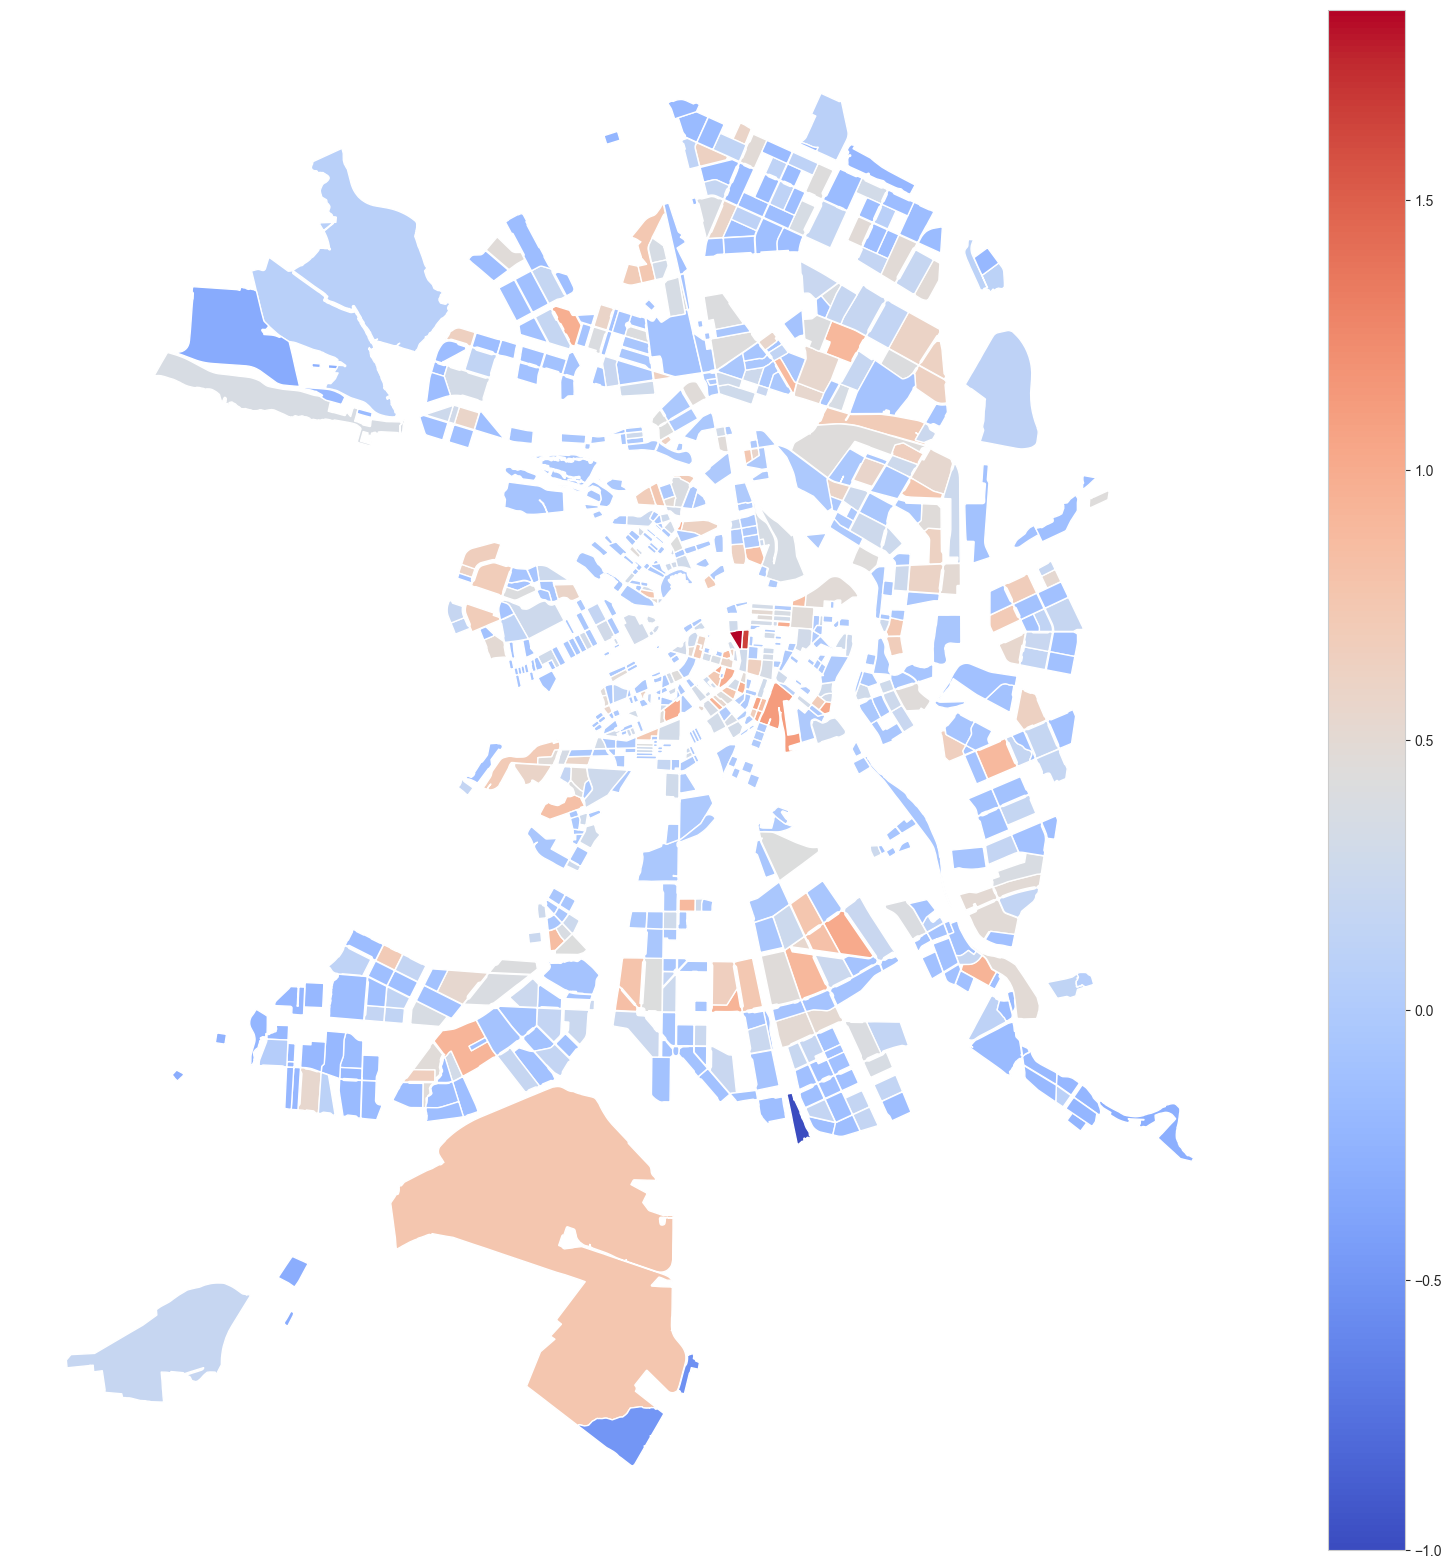

In [37]:
plt.figure(figsize=(20, 20))  
central.plot(ax=plt.gca(), color="#ddd", alpha=1)
central.plot(ax=plt.gca(), column='centrality', legend=True, cmap='coolwarm')
plt.gca().set_axis_off()
plt.show()

In [11]:
services

,geometry,block_id,service_type,capacity,area,building_id
0,"POLYGON ((355887.631 6648099.413, 355846.790 6...",0,park,895,1331.387571,NaN
1,"POLYGON ((355909.697 6648207.480, 355902.165 6...",0,park,247,220.142099,NaN
2,"POLYGON ((355901.254 6648164.076, 355888.771 6...",0,park,82,370.154865,NaN
3,"POLYGON ((355561.165 6648179.605, 355570.601 6...",0,park,1268,95.711786,NaN
4,"POLYGON ((355571.160 6648192.224, 355564.382 6...",0,park,184,102.132673,NaN
...,...,...,...,...,...,...
5059,POINT (348150.051 6660928.956),3746,school,619,8000.000000,157497.0
5060,POINT (337995.656 6637224.912),3751,school,322,3600.000000,25311.0
5061,POINT (350389.484 6644764.124),3790,school,931,11000.000000,74387.0
5062,POINT (350433.616 6644757.296),3790,school,931,11000.000000,152893.0


In [12]:
services.explore()